# NMF

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.load("../Data/LPS/control1_x.npy")

/home/vmuser/anaconda3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Reconstruction error: 0.8104


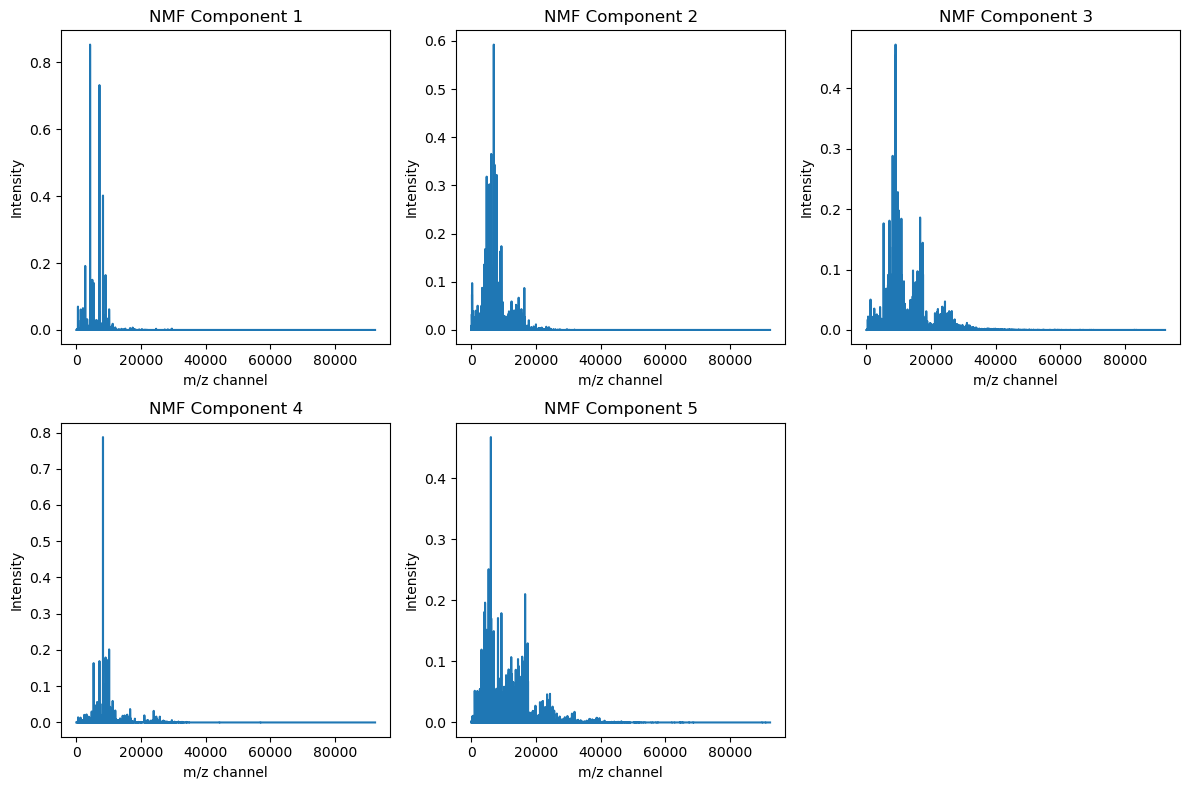

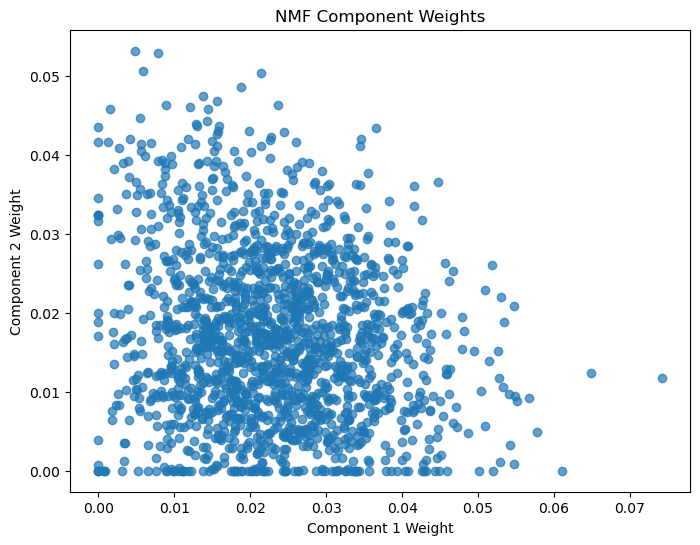

Component 1 - Top sample indices: [217 323 134  28  36]
Component 1 - Top weights: [0.05676972 0.05775304 0.06107511 0.0648417  0.07423556]
Component 2 - Top sample indices: [ 942 1034  837  834 1614]
Component 2 - Top weights: [0.04864764 0.05043309 0.05071903 0.05289864 0.05324609]
Component 3 - Top sample indices: [1557  342 1283  641  905]
Component 3 - Top weights: [0.031503   0.03169347 0.03379336 0.03406443 0.03516029]


In [3]:
from sklearn.decomposition import NMF

n_components = 10  # Choose number of components
nmf = NMF(n_components=n_components, random_state=42, max_iter=200)
W = nmf.fit_transform(X)  # Sample weights
H = nmf.components_  # Component spectra

# Reconstruction error
reconstruction_error = nmf.reconstruction_err_
print(f"Reconstruction error: {reconstruction_error:.4f}")

# Plot component spectra (basis vectors)
plt.figure(figsize=(12, 8))
for i in range(min(5, n_components)):  # Plot first 5 components
    plt.subplot(2, 3, i+1)
    plt.plot(H[i])
    plt.title(f'NMF Component {i+1}')
    plt.xlabel('m/z channel')
    plt.ylabel('Intensity')
plt.tight_layout()
plt.show()

# Plot weights for first two components
plt.figure(figsize=(8, 6))
plt.scatter(W[:, 0], W[:, 1], alpha=0.7)
plt.xlabel('Component 1 Weight')
plt.ylabel('Component 2 Weight')
plt.title('NMF Component Weights')
plt.show()

# Show which samples have highest weights for each component
for i in range(min(3, n_components)):
    top_samples = np.argsort(W[:, i])[-5:]  # Top 5 samples
    print(f"Component {i+1} - Top sample indices: {top_samples}")
    print(f"Component {i+1} - Top weights: {W[top_samples, i]}")